In [138]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc

rc('animation', html='jshtml')
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = [10, 8]

In [241]:
def reset():
    global v, vnew, n
    v = np.zeros((n+1, n+1))
    vnew = np.zeros((n+1, n+1))

    # Set the boundary conditions
    for i in range(1,n):
        v[0,i] = 10
        v[n,i] = 10
        v[i,0] = 10
        v[i,n] = 10

L = 10

# The grid is n+1 points along x and y, including boundary points 0 and n
n = 10

# The grid spacing is L/n

# The number of iterations
nsteps = 10

# Initialize the grid to 0
v = np.zeros((n+1, n+1))
vnew = np.zeros((n+1, n+1))
reset()

In [242]:
# perform one step of relaxation
def relax(n, v, checker):
    for check in range(0,checker):
        for x in range(1,n):
            for y in range(1,n):
                if (x*(n+1) + y) % checker == check:
                    vnew[x,y] = (v[x-1][y] + v[x+1][y] + v[x][y-1] + v[x][y+1])*0.25

        # Copy back the new values to v
        # Note that you can directly store in v instead of vnew with Gauss-Seidel or checkerboard
        for x in range(1,n):
            for y in range(1,n):
                if (x*(n+1) + y) % checker == check:
                    v[x,y] = vnew[x,y]

def update(step):
    #print(step)
    global n, v, checker

    # FuncAnimation calls update several times with step=0,
    # so we needs to skip the update with step=0 to get
    # the correct number of steps 
    if step > 0:
        relax(n, v, checker)

    im.set_array(v)
    return im,

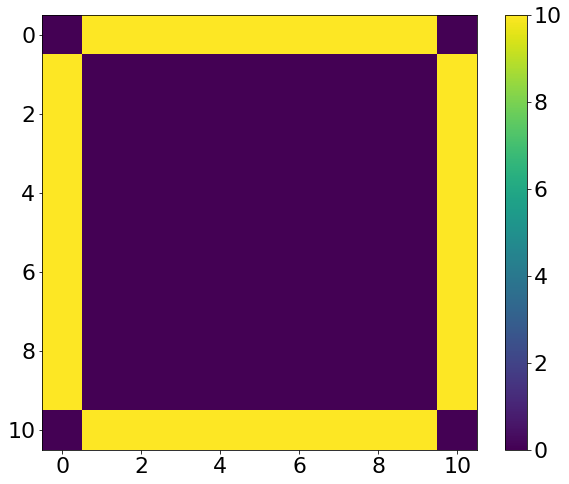

In [243]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(v, cmap=None, interpolation='nearest')
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

# checker=1: no checkboard, checker=2: checkerboard (note: n should be even)
checker = 1

In [244]:
def c_1(plot = True):
    global v, vnew, n
    v = np.zeros((n+1, n+1))
    vnew = np.zeros((n+1, n+1))

    # Set the boundary conditions
    for i in range(1,n):
        v[0,i] = 10
        v[n,i] = 10
        v[i,0] = 5
        v[i,n] = 5

    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        im = ax.contourf(v, cmap=None)
        fig.colorbar(im, ax=ax)
        fig.patch.set_facecolor('xkcd:white')
    
def c_2(plot = True):
    global v, vnew, n
    v = np.zeros((n+1, n+1))
    vnew = np.zeros((n+1, n+1))

    # Set the boundary conditions
    for i in range(1,n):
        v[0,i] = 0
        v[n,i] = 10
        v[i,0] = 10
        v[i,n] = 10

    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        im = ax.contourf(v, cmap=None)
        fig.colorbar(im, ax=ax)
        fig.patch.set_facecolor('xkcd:white')

In [209]:
### Random walk a)
def walk(x,y, steps): 
    xd = x
    yd = y
    hits = np.zeros((n+1, n+1))
    prev_R = None
    for i in range(steps):
        x = xd
        y = yd
        while 0 < x < n and 0 < y < n:
            while True:
                R = np.random.randint(0,4)  # Random number between 1 and 4

                if prev_R is None:
                    break
                elif prev_R == 0 and R != 1:
                    break
                elif prev_R == 1 and R != 0:
                    break
                elif prev_R == 2 and R != 3:
                    break
                elif prev_R == 3 and R != 2:
                    break

            prev_R = R

            if R < 2:   # Move on the x axis
                if R == 0:
                    R = 1
                else:
                    R = -1
                x += R
            else:       # Move on the y axis
                if R == 2:
                    R = 1
                else:
                    R = -1
                y += R
        # reached the border
        hits[x,y] += 1
    
    return hits


walkers = 1500

G = [[[] for i in range(n+1)] for i in range(n+1)]  # Store the G function

In [210]:
# Calculate G
for x in range(1,n):
    for y in range(1,n):
        w = walk(x,y, walkers)
        G[x][y] = w

In [211]:
with open("G.npy", "wb") as f:
    # Writing data to a file
    np.save(f, np.array(G))

C:\Users\Simon\AppData\Local\Temp/ipykernel_24096/57270929.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.save(f, np.array(G))


In [6]:
with open("G.npy", "rb") as f:
    # Reading form a file
    G_read = np.load(f, allow_pickle=True)

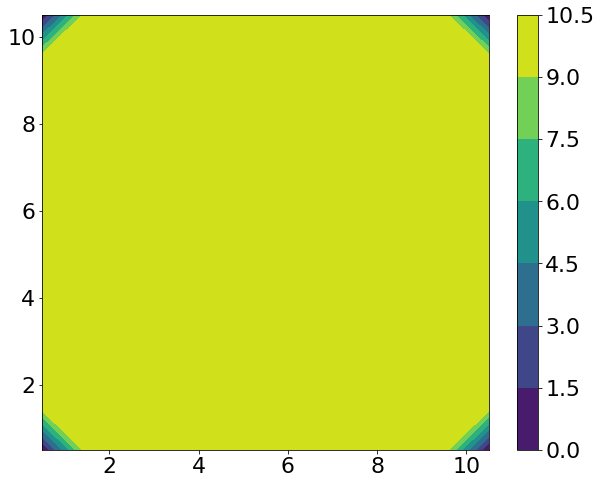

In [245]:
def Gsum(x,y):
    s = 0
    for i in range(1,n):
        # v[0,i] = 0
        # v[n,i] = 10
        # v[i,0] = 10
        # v[i,n] = 10
        s += G[x][y][0][i]*v[0,i]
        s += G[x][y][n][i]*v[n,i]
        s += G[x][y][i][0]*v[i,0]
        s += G[x][y][i][n]*v[i,n]
    
    return s

for x in range(1,n):
    for y in range(1,n):
        v[x][y] = 1/walkers * Gsum(x,y)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(v, cmap=None, origin='image')
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

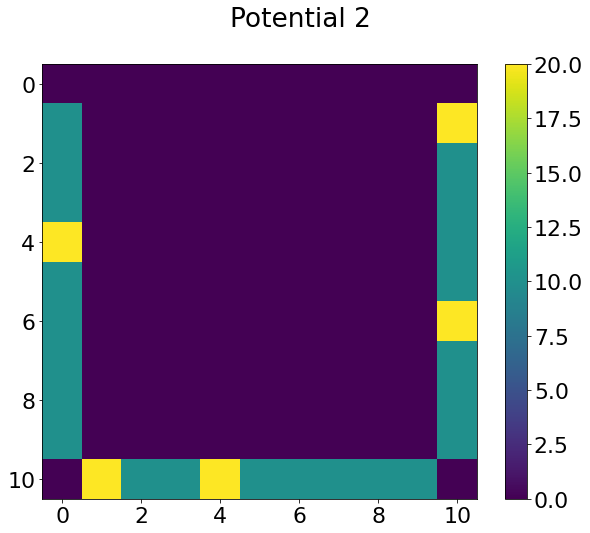

In [247]:
## b)

focus_point1 = (3,5)
focus_point2 = (5,3)

c_2(False) # Setup the geometry, change to c_1 for the first potential

R = np.random.randint(1,n,5) # Random locations to set V = 20
v[n,R[0]] = 20
v[n,R[1]] = 20
v[R[2],0] = 20
v[R[3],n] = 20
v[R[4],n] = 20
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(v, cmap=None)
fig.suptitle("Potential 2")
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

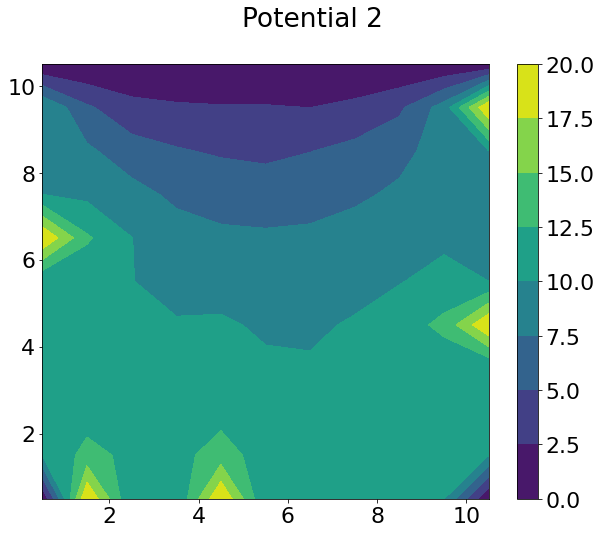

In [248]:
for x in range(1,n):
    for y in range(1,n):
        v[x][y] = 1/walkers * Gsum(x,y)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(v, cmap=None, origin='image')
fig.colorbar(im, ax=ax)
fig.suptitle("Potential 2")
fig.patch.set_facecolor('xkcd:white')

In [249]:
# Find the 5 boundary sites that maximize the focus point 1

focus_points = [focus_point1, focus_point2]


stdarr = [[], []]
numpoints = list(range(1,4*n-3))

for p in range(len(focus_points)):
    for nump in numpoints:
        tempGsum = []
        #for i in range(iterations):
        max5 = np.sort(G[focus_points[p][0]][focus_points[p][1]].reshape(1,(n+1)**2))[0]
        max5 = max5[-nump:len(max5)]

        locations = [(np.where(G[focus_points[p][0]][focus_points[p][1]] == m)[0][0], np.where(G[focus_points[p][0]][focus_points[p][1]] == m)[1][0]) for m in max5]

        # calculate the potential at focus point
        _Gsum = 0
        for loc in locations:
            _Gsum += G[focus_points[p][0]][focus_points[p][1]][loc[0]][loc[1]]*v[loc[0]][loc[1]]

        #    tempGsum.append(v[focus_points[p][0]][focus_points[p][1]] - 1/walkers * _Gsum)

        stdarr[p].append((v[focus_points[p][0]][focus_points[p][1]] - 1/walkers * _Gsum))    

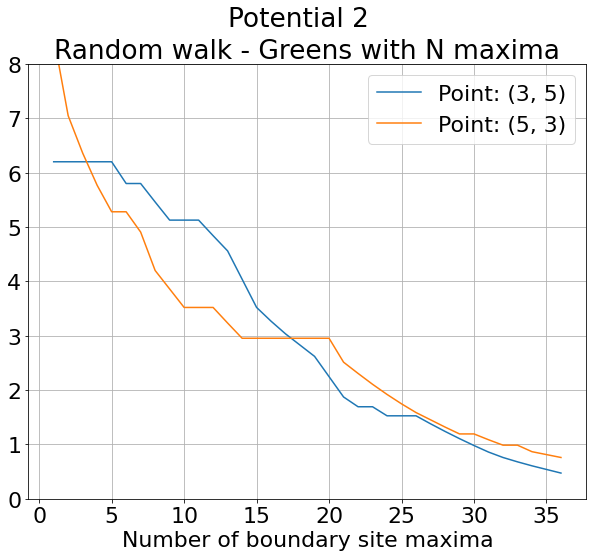

In [250]:
plt.figure()
plt.suptitle("Potential 2")
plt.title("Random walk - Greens with N maxima")
plt.xlabel("Number of boundary site maxima")
plt.ylim(0,8)
plt.grid()
for i in range(len(focus_points)):
    plt.plot(numpoints, stdarr[i], label=f"Point: {focus_points[i]}")
plt.legend()